# Model Cluster (by Ridho)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\ADVAN\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\ADVAN\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\ADVAN\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\ADVAN\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\ADVAN\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\ADVAN\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



C:\Users\ADVAN\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ADVAN\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")



📊 5 customer pertama dengan cluster:
   customer_id      total_spent  unique_products  order_count  total_quantity  \
0            5  151900,00000000                1            1               1   
1            6  329000,00000000                1            1               1   
2            7   20580,00000000                1            1               1   
3            8  780000,00000000                1            1               1   
4           10  159000,00000000                1            1               1   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0  

📈 Jumlah customer per cluster:
cluster
0    69
1    16
2     9
Name: count, dtype: int64

✅ File hasil disimpan sebagai 'clustered_customers.csv'.


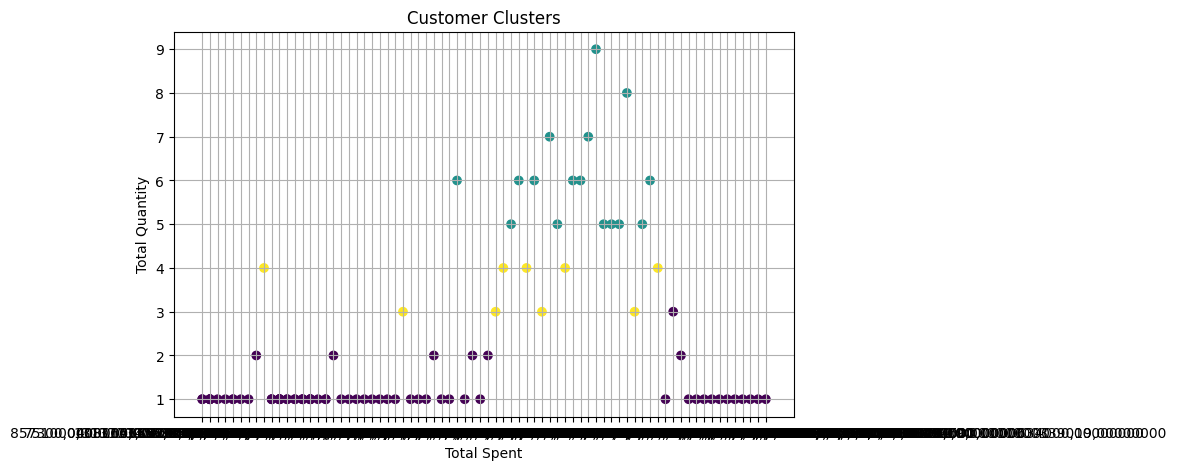

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ----------------------
# Konfigurasi
# ----------------------
FACT_SALES_FILE = "csv/fact_sales_v2.csv"
ORDERS_FILE = "orders.csv"
CLUSTER_TYPE = 'customer'  # Pilihan: 'customer' atau 'order'
N_CLUSTERS = 3

# ----------------------
# Fungsi clustering customer
# ----------------------
def cluster_customers():
    # Load data
    df = pd.read_csv(FACT_SALES_FILE, sep=";", quotechar='"')

    # Bersihkan nama kolom
    df.columns = df.columns.str.strip()

    # Validasi kolom
    required_cols = ['customer_id', 'product_id', 'order_id', 'total_amount', 'product_qty']
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"Kolom '{col}' tidak ditemukan dalam file fact sales")

    # Grup per customer
    customer_df = df.groupby('customer_id').agg({
        'total_amount': 'sum',
        'product_id': 'nunique',
        'order_id': 'nunique',
        'product_qty': 'sum'
    }).reset_index()

    customer_df.columns = ['customer_id', 'total_spent', 'unique_products', 'order_count', 'total_quantity']

    # Validasi dan konversi fitur
    features = customer_df[['total_spent', 'unique_products', 'order_count', 'total_quantity']].copy()
    features = features.apply(pd.to_numeric, errors='coerce')  # Konversi ke numerik
    features = features.fillna(0)  # Ganti NaN dengan 0

    # Clustering
    kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
    customer_df['cluster'] = kmeans.fit_predict(features)

    # Tampilkan hasil
    print("\n📊 5 customer pertama dengan cluster:")
    print(customer_df.head())

    print("\n📈 Jumlah customer per cluster:")
    print(customer_df['cluster'].value_counts())

    # Simpan ke CSV
    customer_df.to_csv("clustered_customers.csv", index=False)
    print("\n✅ File hasil disimpan sebagai 'clustered_customers.csv'.")

    # Visualisasi
    plt.figure(figsize=(8, 5))
    plt.scatter(customer_df['total_spent'], customer_df['total_quantity'], c=customer_df['cluster'], cmap='viridis')
    plt.xlabel('Total Spent')
    plt.ylabel('Total Quantity')
    plt.title('Customer Clusters')
    plt.grid(True)
    plt.show()

# ----------------------
# Fungsi clustering order
# ----------------------
def cluster_orders():
    # Load data
    df = pd.read_csv(ORDERS_FILE)

    # Bersihkan nama kolom
    df.columns = df.columns.str.strip()

    if 'order_id' not in df.columns:
        raise ValueError("Kolom 'order_id' tidak ditemukan dalam file orders.csv")

    # Pilih kolom numerik (kecuali order_id)
    features = df.select_dtypes(include='number')
    if 'order_id' in features.columns:
        features = features.drop(columns=['order_id'])

    if features.empty:
        raise ValueError("Tidak ada fitur numerik yang tersedia untuk clustering orders")

    # Tangani NaN
    features = features.fillna(0)

    # Clustering
    kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
    df['cluster'] = kmeans.fit_predict(features)

    # Output
    print("\n📊 5 order pertama dengan cluster:")
    print(df[['order_id', 'cluster']].head())

    print("\n📈 Jumlah order per cluster:")
    print(df['cluster'].value_counts())

    # Simpan ke CSV
    df.to_csv("clustered_orders.csv", index=False)
    print("\n✅ File hasil disimpan sebagai 'clustered_orders.csv'")

# ----------------------
# MAIN
# ----------------------
if CLUSTER_TYPE == 'customer':
    cluster_customers()
elif CLUSTER_TYPE == 'order':
    cluster_orders()
else:
    raise ValueError("CLUSTER_TYPE harus 'customer' atau 'order'")


X-Axis: Total Spent (pengeluaran total per pelanggan)

Y-Axis: Total Quantity (jumlah barang yang dibeli)

Warna Titik: Menunjukkan klaster yang terbentuk 

| Klaster    | Quantity | Total Spent   | Karakter             | Strategi                       |
| ---------- | -------- | ------------- | -------------------- | ------------------------------ |
| 1 (Ungu)   | Rendah   | Rendah–Sedang | Low-value / Pasif    | Promosi, edukasi, loyalty awal |
| 2 (Kuning) | Sedang   | Sedang        | Rutin / Menengah     | Upsell, cross-sell             |
| 3 (Hijau)  | Tinggi   | Tinggi        | High-value / Loyalis | VIP treatment, personalisasi   |

Untuk parameter nya yaitu: 
| Parameter         | Sumber Kolom   | Deskripsi Singkat                     |
| ----------------- | -------------- | ------------------------------------- |
| `total_spent`     | `total_amount` | Total uang yang dibelanjakan customer |
| `total_quantity`  | `quantity`     | Total item yang dibeli                |
| `unique_products` | `product_id`   | Jumlah produk berbeda yang dibeli     |
| `order_count`     | `order_id`     | Jumlah transaksi unik                 |



📊 5 order pertama dengan cluster:
   order_id      order_total  total_quantity  cluster
0      1036   62700,00000000               1        2
1      1037  329000,00000000               1        2
2      1038  550000,00000000               1        2
3      1039  159000,00000000               1        2
4      1040  160000,00000000               1        2

📈 Jumlah order per cluster:
2    69
0    28
1    13
Name: cluster, dtype: int64

✅ File hasil disimpan sebagai 'clustered_orders.csv'.


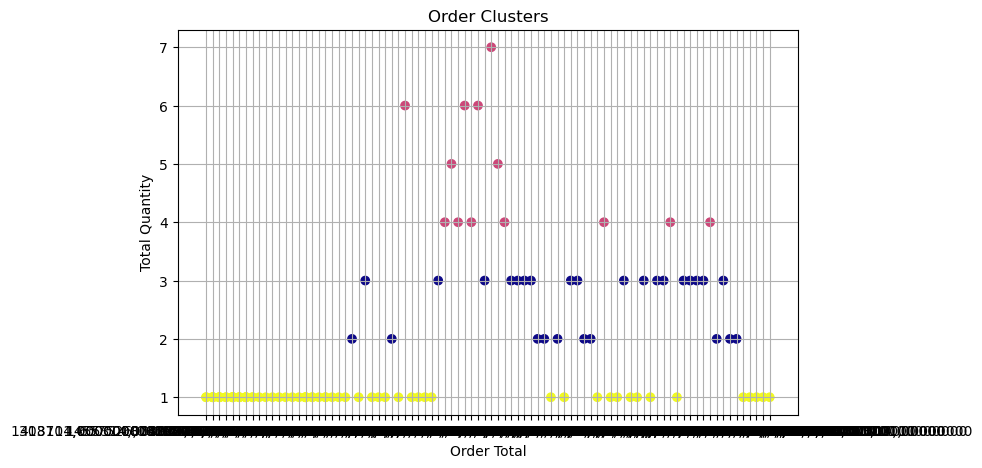

In [25]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ----------------------
# Konfigurasi
# ----------------------
FACT_SALES_FILE = "csv/fact_sales_v2.csv"
ORDERS_FILE = "orders.csv"
CLUSTER_TYPE = 'order'  # Ubah ke 'order' jika ingin jalankan bagian ini
N_CLUSTERS = 3

# ----------------------
# Fungsi clustering customer
# ----------------------
def cluster_customers():
    df = pd.read_csv(FACT_SALES_FILE, sep=";", quotechar='"')
    df.columns = df.columns.str.strip()

    required_cols = ['customer_id', 'product_id', 'order_id', 'total_amount', 'product_qty']
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"Kolom '{col}' tidak ditemukan dalam file fact sales")

    customer_df = df.groupby('customer_id').agg({
        'total_amount': 'sum',
        'product_id': 'nunique',
        'order_id': 'nunique',
        'product_qty': 'sum'
    }).reset_index()

    customer_df.columns = ['customer_id', 'total_spent', 'unique_products', 'order_count', 'total_quantity']

    features = customer_df[['total_spent', 'unique_products', 'order_count', 'total_quantity']].copy()
    features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

    kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
    customer_df['cluster'] = kmeans.fit_predict(features)

    print("\n📊 5 customer pertama dengan cluster:")
    print(customer_df.head())

    print("\n📈 Jumlah customer per cluster:")
    print(customer_df['cluster'].value_counts())

    customer_df.to_csv("clustered_customers.csv", index=False)
    print("\n✅ File hasil disimpan sebagai 'clustered_customers.csv'.")

    plt.figure(figsize=(8, 5))
    plt.scatter(customer_df['total_spent'], customer_df['total_quantity'], c=customer_df['cluster'], cmap='viridis')
    plt.xlabel('Total Spent')
    plt.ylabel('Total Quantity')
    plt.title('Customer Clusters')
    plt.grid(True)
    plt.show()

# ----------------------
# Fungsi clustering order (Diperbarui)
# ----------------------
def cluster_orders():
    # Load data fact sales
    df = pd.read_csv(FACT_SALES_FILE, sep=";", quotechar='"')
    df.columns = df.columns.str.strip()

    required_cols = ['order_id', 'total_amount', 'product_qty']
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"Kolom '{col}' tidak ditemukan dalam file fact sales")

    # Agregasi data pembelian per order_id
    order_df = df.groupby('order_id').agg({
        'total_amount': 'sum',
        'product_qty': 'sum'
    }).reset_index()

    order_df.columns = ['order_id', 'order_total', 'total_quantity']

    # Clustering
    features = order_df[['order_total', 'total_quantity']].copy()
    features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

    kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
    order_df['cluster'] = kmeans.fit_predict(features)

    print("\n📊 5 order pertama dengan cluster:")
    print(order_df.head())

    print("\n📈 Jumlah order per cluster:")
    print(order_df['cluster'].value_counts())

    order_df.to_csv("clustered_orders.csv", index=False)
    print("\n✅ File hasil disimpan sebagai 'clustered_orders.csv'.")

    plt.figure(figsize=(8, 5))
    plt.scatter(order_df['order_total'], order_df['total_quantity'], c=order_df['cluster'], cmap='plasma')
    plt.xlabel('Order Total')
    plt.ylabel('Total Quantity')
    plt.title('Order Clusters')
    plt.grid(True)
    plt.show()

# ----------------------
# MAIN
# ----------------------
if CLUSTER_TYPE == 'customer':
    cluster_customers()
elif CLUSTER_TYPE == 'order':
    cluster_orders()
else:
    raise ValueError("CLUSTER_TYPE harus 'customer' atau 'order'")


X-Axis: Order Total (nilai total transaksi/order)

Y-Axis: Total Quantity (jumlah item dalam order)

Warna Titik: Menggambarkan klaster

| Klaster    | Quantity | Order Total   | Karakter Order     | Strategi                                 |
| ---------- | -------- | ------------- | ------------------ | ---------------------------------------- |
| 1 (Kuning) | Rendah   | Variatif      | Basic/1-item Order | Upsell, bundling, ajak beli lebih banyak |
| 2 (Biru)   | Sedang   | Sedang–Tinggi | Rata-rata umum     | Promosi repeat order, rekomendasi produk |
| 3 (Merah)  | Tinggi   | Tinggi        | Bulk Order / Loyal | Perlakuan premium, insentif loyalitas    |
